# Regresión logística

Disponemos de una base de datos con las calificaciones en el examen final y evaluación continua de 100 alumnos.<p>
Están clasificados en los que han aprobado y los que no. Lo vemos gráficamente.

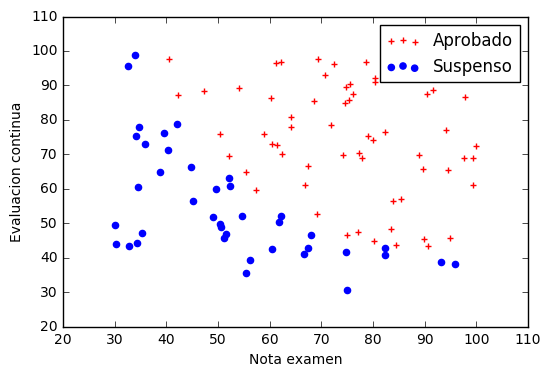

In [1]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt("notas.txt", delimiter= ",")
X = np.c_[data[:,0:2]]
y = np.c_[data[:,2]]
def plotNotas(X, y):
    X1 = X[:,0:1]
    X2 = X[:,1:2]
    plt.scatter(X1[y==1],X2[y==1],color = "red",marker="+")
    plt.scatter(X1[y==0],X2[y==0],color = "blue",marker="o")
    plt.xlabel('Nota examen')
    plt.ylabel('Evaluacion continua')
    plt.legend(['Aprobado','Suspenso'])
plotNotas(X, y)
plt.show()

Aplicamos el modelo de regresión logística, ajustando los parámetros con scikit-learn tomando $C=100$.

In [2]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=100, max_iter = 100, tol= 1e-8)
reg.fit(X, y.ravel())
reg.densify()
print('Valor de los parámetros')
reg.coef_ , reg.intercept_

Valor de los parámetros


(array([[ 0.16571441,  0.16043276]]), array([-20.09128011]))

Hemos obtenido nuestros parámetros $\theta=(\theta_{0},\theta_{1},\theta_{2})$. <p>
Siendo nuestra frontera de decisión con p=0.5 la recta :
$$r(x_{1},x_{2})= \theta_{0}+x_{1}\theta_{1}+x_{2}\theta_{2} = 0$$

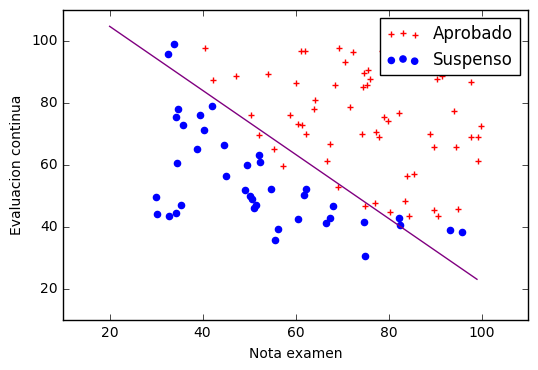

In [3]:
plotNotas(X,y)
r = np.arange(20,100,1)
plt.plot(r, (-r*reg.coef_[0][0]-reg.intercept_[0])/reg.coef_[0][1],color='purple')
precision = reg.score(X, y)
plt.show()

Podemos apreciar que existen relaciones no lineales entre las notas y el hecho de aprobar la asignatura. <p>
Por ejemplo, alumnos con la máxima calificación en una de las evaluaciones,pero muy baja en la otra no han aprobado.

Una posible razón sería que se necesita una nota mínima en ambas calificaciones para aprobar. <p>
Podemos crear nuevas variables que expresen esta circunstancia. 
Vamos a definir una función con la cual crearemos nuevos input's de segundo grado.

In [4]:
def mapFeature(X1, X2):
    
    import scipy.special
    import numpy as np
    degree = 2
    X1 = np.reshape(X1,newshape= (np.size(X1),1))
    output = X1[:, 0:1]
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            
            if (i==1 and j==0):                
                continue
            else:
                f = (X1** (i - j) * (X2 ** j))
                output = np.append(output, f, axis = 1)
    return output

Nuestros nuevos valores input serían:

#### $x_{1}=$ Nota examen
#### $x_{2}=$ Nota evaluación continua
#### $x_{3}= x_{1}^{2}=$(Nota examen)$^{2}$
#### $x_{4}= x_{1}\text{·}x_{2}=$ (Nota examen)(Nota evaluación continua)
#### $x_{5}= x_{1}^{2}=$(Nota evaluación continua)$^{2}$

Observamos el valor para el primer individuo




In [5]:
X_map = mapFeature(X[:,0:1], X[:,1:2])
X_map[0]

array([   34.62365962,    78.02469282,  1198.79780579,  2701.50040635,
        6087.85268893])

Ahora disponemos de más información recogida en las nuevas variables. 

Aplicamos el modelo de regresión logística con los nuevos datos  tomando $C=100$.

In [6]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=100, max_iter = 100, tol= 1e-8)
reg.fit(X_map, y.ravel())
reg.densify()
reg.coef_ , reg.intercept_

(array([[ -2.61911490e+00,  -5.08673616e+00,  -4.97147621e-03,
           1.24028973e-01,   1.47594429e-02]]), array([-0.13048572]))

Hemos obtenido nuestros parámetros $\theta=(\theta_{0},\theta_{1},\theta_{2},\theta_{3},\theta_{4}, \theta_{5})$. Siendo nuestra frontera de decisión con p=0.5, la curva: <p>
$$c(x)= \theta_{0}+x_{1}\theta_{1}+x_{2}\theta_{2}+x_{3}\theta_{3}+x_{4}\theta_{4}+x_{5}\theta_{5}$$

Debido a la naturaleza de nuestros datos, podemos representarla como <p>
$$c(x_{1},x_{2})= \theta_{0}+x_{1}\theta_{1}+x_{2}\theta_{2}+x_{1}^{2}\theta_{3}+x_{1}x_{2}\theta_{4}+x_{2}^{2}\theta_{5}$$

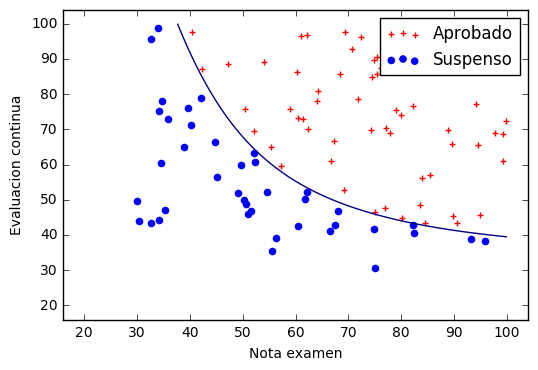

In [7]:
plotNotas(X, y)
u = np.linspace(20, 100, 100)
v = np.linspace(20, 100, 100)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        Xi = mapFeature(np.array(u[i]), np.array(v[j]))
        z[i, j] = np.dot(reg.coef_,Xi.T) + reg.intercept_
z = z.T
plt.contour(u, v, z, levels = [0])
plt.show()

Hemos conseguido clasificar correctamente todos los ejemplos de entrenamiento. <p>
Esto ha sido posible con la creación de nuevas características a partir de las básicas $x_{1}, x_{2}$. <p>

Hemos podido representarlo gráficamente al disponer solo de dos atributos, nota en evaluación continua y examen.